In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder,StandardScaler,MinMaxScaler
import matplotlib.pyplot as plt


In [ ]:
df=pd.read_csv('/content/train_loan_preprocess.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [10]:
df.head()

,Loan_ID,Gender,Married,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.shape

(614, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
df.drop(columns=['Education'],inplace=True)
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: xlabel='Gender', ylabel='Count'>

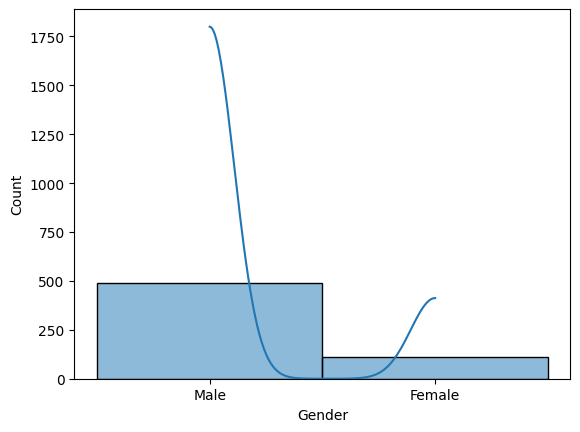

In [ ]:
sns.histplot(df['Gender'],kde=True)

In [12]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df.isna().sum()

Loan_ID               0
Gender                0
Married               3
Dependents           15
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: xlabel='Married', ylabel='Count'>

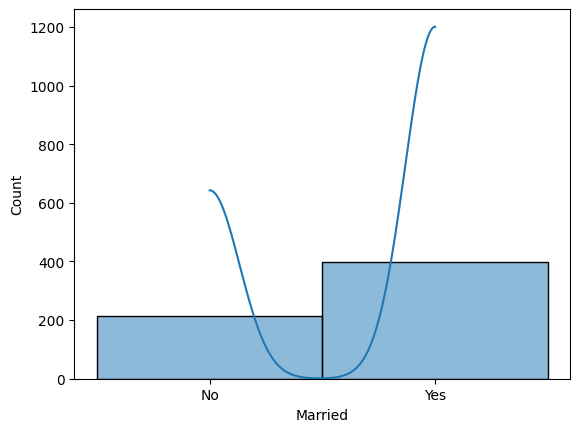

In [14]:
sns.histplot(df['Married'],kde=True)

In [15]:
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           15
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: xlabel='Dependents', ylabel='Count'>

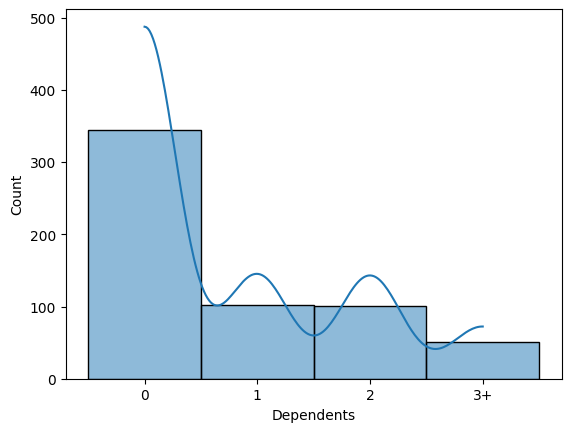

In [17]:
sns.histplot(df['Dependents'],kde=True)

In [18]:
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: xlabel='Self_Employed', ylabel='Count'>

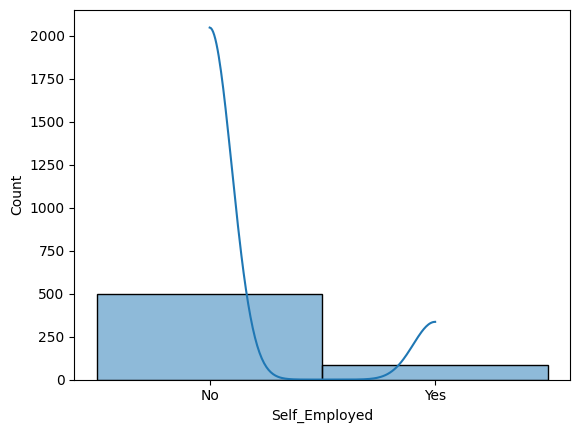

In [19]:
sns.histplot(df['Self_Employed'],kde=True)

In [20]:
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: xlabel='LoanAmount', ylabel='Count'>

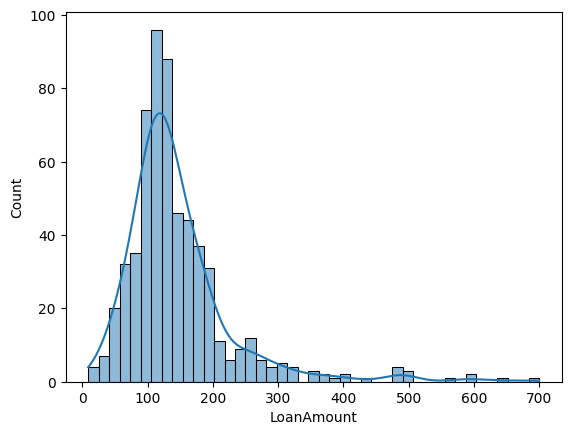

In [21]:
sns.histplot(df['LoanAmount'],kde=True)

In [22]:
df['LoanAmount'].fillna(df['LoanAmount'].mode()[0],inplace=True)
df.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: xlabel='Loan_Amount_Term', ylabel='Count'>

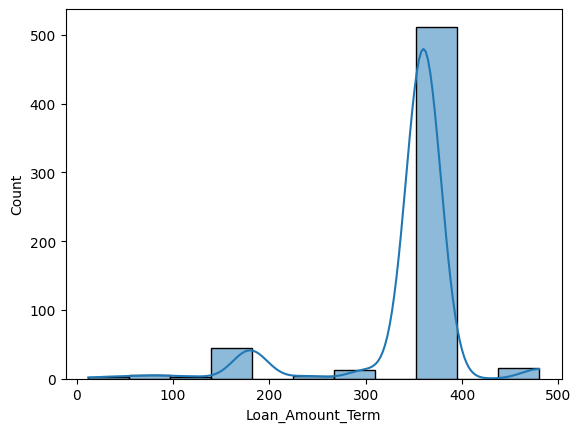

In [23]:
sns.histplot(df['Loan_Amount_Term'],kde=True)

In [24]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)
df.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: xlabel='Credit_History', ylabel='Count'>

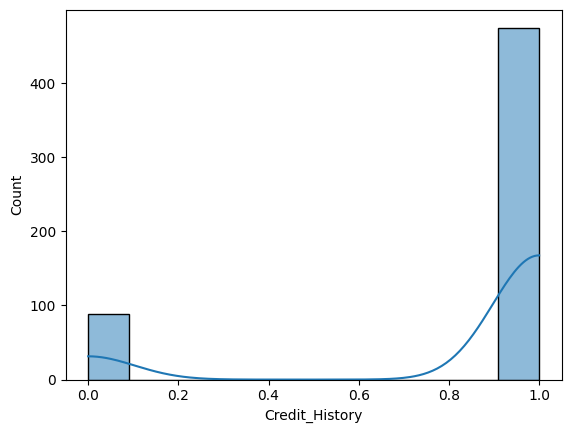

In [25]:
sns.histplot(df['Credit_History'],kde=True)

In [26]:
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [28]:
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x7a81d6501510>,
 'caps': [<matplotlib.lines.Line2D at 0x7a81d6501a50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a81d6501270>],
 'medians': [<matplotlib.lines.Line2D at 0x7a81d6501f90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7a81d6502230>],
 'means': []}

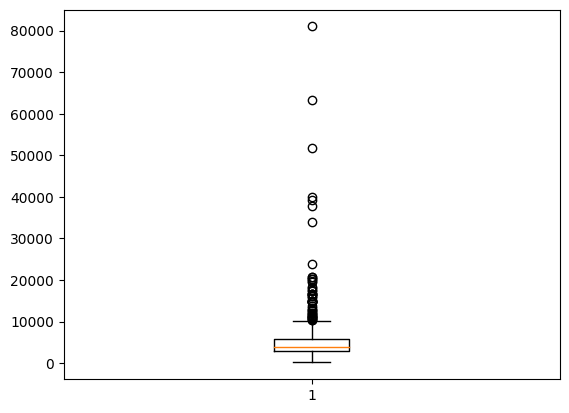

In [32]:
plt.boxplot(df['ApplicantIncome'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7a81d6579ae0>,
 'caps': [<matplotlib.lines.Line2D at 0x7a81d657a020>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a81d6579840>],
 'medians': [<matplotlib.lines.Line2D at 0x7a81d657a560>],
 'fliers': [<matplotlib.lines.Line2D at 0x7a81d657a800>],
 'means': []}

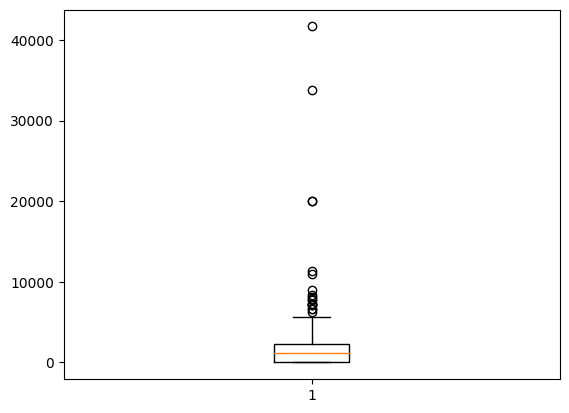

In [33]:
plt.boxplot(df['CoapplicantIncome'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7a81d63cfe50>,
 'caps': [<matplotlib.lines.Line2D at 0x7a81d64042b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a81d63cfbb0>],
 'medians': [<matplotlib.lines.Line2D at 0x7a81d64047f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7a81d6404a90>],
 'means': []}

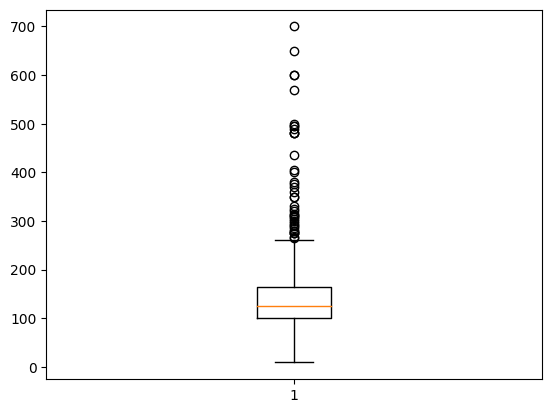

In [35]:
plt.boxplot(df['LoanAmount'])

In [36]:
q1=np.percentile(df['ApplicantIncome'],25,interpolation='midpoint')
q2=np.percentile(df['ApplicantIncome'],50,interpolation='midpoint')
q3=np.percentile(df['ApplicantIncome'],75,interpolation='midpoint')
print(q1,q2,q3)

2879.0 3812.5 5790.0


In [37]:
iqr=q3-q1
print(iqr)

2911.0


In [38]:
minval=q1-1.5*iqr
maxval=q3+1.5*iqr
print(minval,maxval)

-1487.5 10156.5


In [39]:
Outliers=[]
for i in df['ApplicantIncome']:
  if i<minval or i>maxval:
    Outliers.append(i)
print(Outliers)

[12841, 12500, 11500, 10750, 13650, 11417, 14583, 10408, 23803, 10513, 20166, 14999, 11757, 14866, 39999, 51763, 33846, 39147, 12000, 11000, 16250, 14683, 11146, 14583, 20667, 20233, 15000, 63337, 19730, 15759, 81000, 14880, 12876, 10416, 37719, 16692, 16525, 16667, 10833, 18333, 17263, 20833, 13262, 17500, 11250, 18165, 19484, 16666, 16120, 12000]


In [40]:
df['ApplicantIncome']=df['ApplicantIncome'].clip(minval,maxval)
df

,Loan_ID,Gender,Married,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,No,5849.0,0.0,120.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,No,2900.0,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,No,4106.0,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,No,8072.0,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,No,7583.0,0.0,187.0,360.0,1.0,Urban,Y


{'whiskers': [<matplotlib.lines.Line2D at 0x7a81d645bc10>,
 'caps': [<matplotlib.lines.Line2D at 0x7a81d6484190>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a81d645b970>],
 'medians': [<matplotlib.lines.Line2D at 0x7a81d64846d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7a81d6484970>],
 'means': []}

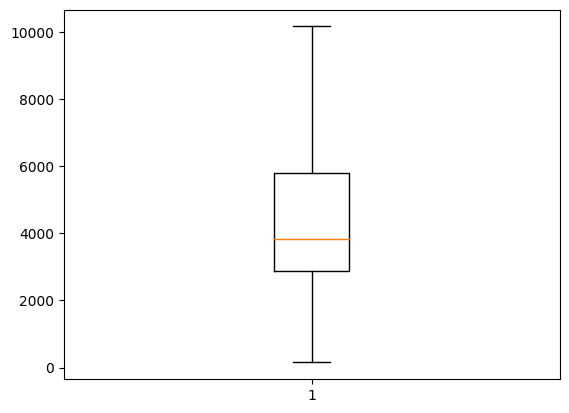

In [41]:
plt.boxplot(df['ApplicantIncome'])

In [42]:
q1=np.percentile(df['CoapplicantIncome'],25,interpolation='midpoint')
q1=np.percentile(df['CoapplicantIncome'],25,interpolation='midpoint')
q1=np.percentile(df['CoapplicantIncome'],25,interpolation='midpoint')
print(q1,q2,q3)

0.0 3812.5 5790.0


In [43]:
iqr=q3-q1
print(iqr)

5790.0


In [44]:
minval=q1-1.5*iqr
maxval=q3+1.5*iqr
print(minval,maxval)

-8685.0 14475.0


In [45]:
Outliers=[]
for i in df['CoapplicantIncome']:
  if i<minval or i>maxval:
    Outliers.append(i)
print(Outliers)

[20000.0, 20000.0, 33837.0, 41667.0]


In [46]:
df['CoapplicantIncome']=df['CoapplicantIncome'].clip(minval,maxval)
df

,Loan_ID,Gender,Married,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,No,5849.0,0.0,120.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,No,2900.0,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,No,4106.0,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,No,8072.0,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,No,7583.0,0.0,187.0,360.0,1.0,Urban,Y


{'whiskers': [<matplotlib.lines.Line2D at 0x7a81d62d68f0>,
 'caps': [<matplotlib.lines.Line2D at 0x7a81d62d6e30>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a81d62d6650>],
 'medians': [<matplotlib.lines.Line2D at 0x7a81d62d7370>],
 'fliers': [<matplotlib.lines.Line2D at 0x7a81d62d72b0>],
 'means': []}

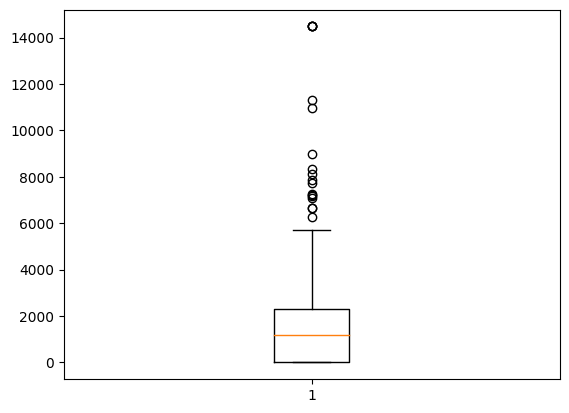

In [47]:
plt.boxplot(df['CoapplicantIncome'])

In [48]:
q1=np.percentile(df['LoanAmount'],25,interpolation='midpoint')
q1=np.percentile(df['LoanAmount'],25,interpolation='midpoint')
q1=np.percentile(df['LoanAmount'],25,interpolation='midpoint')
print(q1,q2,q3)

100.5 3812.5 5790.0


In [49]:
iqr=q3-q1
print(iqr)

5689.5


In [50]:
minval=q1-1.5*iqr
maxval=q3+1.5*iqr
print(minval,maxval)

-8433.75 14324.25


In [51]:
Outliers=[]
for i in df['LoanAmount']:
  if i<minval or i>maxval:
    Outliers.append(i)
print(Outliers)

[]


In [52]:
df['LoanAmount']=df['LoanAmount'].clip(minval,maxval)
df

,Loan_ID,Gender,Married,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,No,5849.0,0.0,120.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,No,2900.0,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,No,4106.0,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,No,8072.0,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,No,7583.0,0.0,187.0,360.0,1.0,Urban,Y


{'whiskers': [<matplotlib.lines.Line2D at 0x7a81d635a7d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7a81d635abf0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a81d635a530>],
 'medians': [<matplotlib.lines.Line2D at 0x7a81d635b160>],
 'fliers': [<matplotlib.lines.Line2D at 0x7a81d635b400>],
 'means': []}

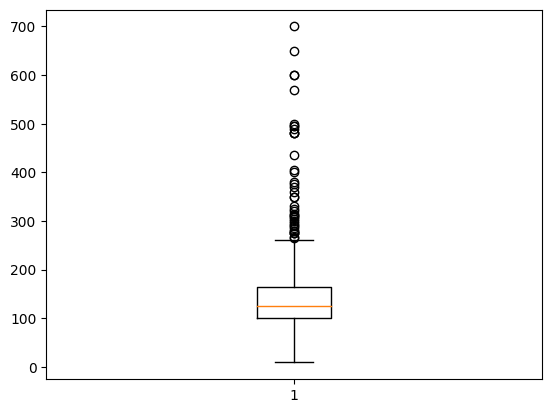

In [53]:
plt.boxplot(df['LoanAmount'])

In [54]:
df

,Loan_ID,Gender,Married,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,No,5849.0,0.0,120.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,No,2900.0,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,No,4106.0,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,No,8072.0,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,No,7583.0,0.0,187.0,360.0,1.0,Urban,Y


In [56]:
categorical_cols=['Gender','Married','Dependents','Self_Employed','Property_Area','Loan_Status']
numerical_cols=['LoanAmount','ApplicantIncome','Loan_Amount_Term','CoapplicantIncome']

In [57]:
df_encoded=pd.get_dummies(df,columns=categorical_cols,dtype=int,drop_first=True)
df_encoded.head()

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,LP001002,5849.0,0.0,120.0,360.0,1.0,1,0,0,0,0,0,0,1,1
1,LP001003,4583.0,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0,0,0
2,LP001005,3000.0,0.0,66.0,360.0,1.0,1,1,0,0,0,1,0,1,1
3,LP001006,2583.0,2358.0,120.0,360.0,1.0,1,1,0,0,0,0,0,1,1
4,LP001008,6000.0,0.0,141.0,360.0,1.0,1,0,0,0,0,0,0,1,1


In [58]:
df_encoded.shape

(614, 15)

In [59]:
df_std_scaled=df_encoded.copy()
std_scaler=StandardScaler()
df_std_scaled[numerical_cols]=std_scaler.fit_transform(df_std_scaled[numerical_cols])
df_std_scaled.head()

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,LP001002,0.498190,-0.744058,-0.302759,0.273231,1.0,1,0,0,0,0,0,0,1,1
1,LP001003,-0.013296,-0.009464,-0.207648,0.273231,1.0,1,1,1,0,0,0,0,0,0
2,LP001005,-0.652856,-0.744058,-0.944757,0.273231,1.0,1,1,0,0,0,1,0,1,1
3,LP001006,-0.821331,0.404598,-0.302759,0.273231,1.0,1,1,0,0,0,0,0,1,1
4,LP001008,0.559196,-0.744058,-0.053093,0.273231,1.0,1,0,0,0,0,0,0,1,1


In [60]:
df_minmax_scaled=df_encoded.copy()
minmax_scaler=MinMaxScaler()
df_minmax_scaled[numerical_cols]=std_scaler.fit_transform(df_minmax_scaled[numerical_cols])
df_minmax_scaled.head()

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,LP001002,0.498190,-0.744058,-0.302759,0.273231,1.0,1,0,0,0,0,0,0,1,1
1,LP001003,-0.013296,-0.009464,-0.207648,0.273231,1.0,1,1,1,0,0,0,0,0,0
2,LP001005,-0.652856,-0.744058,-0.944757,0.273231,1.0,1,1,0,0,0,1,0,1,1
3,LP001006,-0.821331,0.404598,-0.302759,0.273231,1.0,1,1,0,0,0,0,0,1,1
4,LP001008,0.559196,-0.744058,-0.053093,0.273231,1.0,1,0,0,0,0,0,0,1,1


In [61]:
df_minmax_scaled.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
count,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,6.654105e-17,-8.679268e-18,-5.786179e-17,5.930833e-17,0.855049,0.817590,0.653094,0.166124,0.164495,0.083062,0.133550,0.379479,0.328990,0.687296
std,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00,0.352339,0.386497,0.476373,0.372495,0.371027,0.276201,0.340446,0.485653,0.470229,0.463973
min,-1.804306e+00,-7.440585e-01,-1.622422e+00,-5.132498e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.023481e-01,-7.440585e-01,-5.375641e-01,2.732313e-01,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-3.245918e-01,-1.651026e-01,-2.433149e-01,2.732313e-01,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,4.763727e-01,3.750045e-01,2.292671e-01,2.732313e-01,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,2.238495e+00,6.307171e+00,6.592777e+00,2.137276e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
